<h1><center> REINFORCEMENT LEARNING </h1></center>

We want to define the path which maximize the total reward. Basic reinforcement is modeled as a Markov decision process (MDP):
- a set of environment and agent states, $S$;
- a set of actions, $A$, of the agent;
- $P_{a}(s,s')=\Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)$ is the probability of transition (at time ${\displaystyle t}$) from state ${\displaystyle s}$ to state ${\displaystyle s'}$ under action $a$. 
- ${\displaystyle R_{a}(s,s')}$ is the immediate reward after transition from $s$ to $s'$ with action $a$.

<h3><center> UPPER-CONFIDENCE BOUND </h3></center>

It's a branch of AI rather than ML. One example is the algorithm which define the movements of a robot dog. There are two main approaches to make the dog walking: give a set of instructions that it must make or train the dog with them plus the bonus (1) and punishment (0) which it'll gain. It isn't necessary to program the robot but the reinforcement learnind do the job. 

We define the **Multi-Armed bandit problem**. 
However, there are several examples of RL. 
One armed machine is a slot machine. The aim is to understand the best machine in order to maximize the profit. Each of them is characterized by an unknown distribution of winning. Our goal is to find the best reward. In our case, the best is the right one because the mode is on the right (max reward) and the probability is the highest one. 
So, the problem aims to find the best machines which is characterized by the best distribution in order to maximize my profits. 
The technique must be relied on the right mix of _exploitation_ and _exploration_. If the latter approach overcome on the former, the searching technique for finding the best machines will be poor. Once the best machine is found with the exploration approach, the exploitation approach will be applied. _Regret_ is the scenario in which we aren't using the optimal machine and it's quantified with the difference between the best outcome and the one obtained. The longer we explore the wrong machine, the regret increases. 

Another example is the search of the right image to advertise a drink in order to maximize the outcome. We don't know the distributionn: we can know it only in the case in which many users click them. The A/B test cannot be performed due to time limitation and it makean exploration: so, the fair mix between exploitation and exploration must be searched. 

The **Upper Confidence Bound Algorithm** for our problem follows the following steps:
- Assume to have $d$ types of ads. 
- Each time a user connects to a web page, one ads over $d$ is chosen.
- At each round $n$, ad $i$ gives a reward $r_i(n) \in {0,1}$: $r_i(n) = 1$ if the user clicked on the $i$ ad, $0$ otherwise.
- Our goal is to maximize the total reward we get over many rounds.
So,
- At each round $n$, we consider $N_i(n)$, namely the number of times the ad $i$ *was selected* (IT MUST BE SELECTED, OTHERWISE IT REMAINS THE SAME FOR THE HIGHEST UCB) up to round $n$, and $R_i(n)$, thus the number of rewards of $i$ ad up to $n$ rounds (IT MUST BE SELECTED FOR THE HIGHEST UCB).
- Compute $r_i(n) = \frac{R_i(n)}{N_i(n)}$, thus the mean number of rewards for $i$ ad, and the associated confidence interval since we are managing a sample. Select the $i$ ad with the **highest upper confidence level**.
- The exploration stops when we select the sd with th highest upper level. The, the exploitation phase can start.

These steps is built for a discrete distribution (in the advertise we are seeking for the proportion). While for the slot machines, we are estimating the mean of the distribution. So, the reward is how much I won and the punishment is how much I lost. $N$ remain the same in order to have a mean. So, $r_i(n)$ is the _mean_ of the money that I won. In this case, starting from a sample, I try to estimate the mean of what I won. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

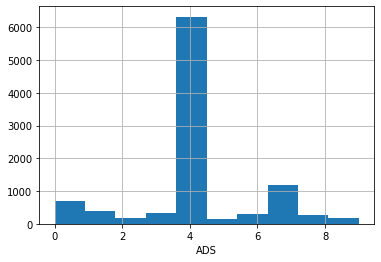

In [5]:
# tha aim is to understand the ad with the best click-through rate.

# a record is characterized by the totality of ads which the user select (it's a simulation).
# Actually, I haven't these information because the user give me one information at a time.
# This is a simulation, indeed I know all of the rewards!
# In the multi-armed problem, I define the reward each time the i-th is selected.
dataset = pd.read_csv('Dataset/Ads_CTR_Optimisation.csv')

import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.xlabel('ADS')
plt.grid()
plt.show()

# the five ads is the most click-beating and so the best one.
# If N=500, there isn't a winner.

<h3><center> THOMPSON SAMPLING </h3></center>

It's made of the following steps:
- At each round $n$, we consider two numbers for each $i$: $N_i^1(n)$, namely the number of times the ad $i$ got reward $1$ up to round $n$, and $N_i^0(n)$, hence the number of times the ad $i$ got reward $0$ up to round $n$.
- For each ad $i$, we take a random draw from the distribution below: $\theta_i(n) = \beta(N_i^1(n)+1, N_i^0(n)+1)$
- We select the ad that has the highest $\theta_i(n)$. Then the values of $N_i^1(n)$ and $N_i^0(n)$ for that $i$ will be up to date.


We start to pull each machine several times. Given several rewards of those machines, the thompson algorithm tries to build the distributions of where we think the actual expected value might lie. So, we aren't building the distribution of the machine but the one of the estimator of the sample mean on the basis of the provided values. We are seeking of the distribution of the _estimator for the mean_. Then, we pull a value from each of the distribution in order to generate our own virtual bandit configuration. Select the one with the best reward and then pull the lever of that machine. Then, the distribution of the mean must be adjusted on the basis of the new provided value. Other rounds are based on the definition of new virtual configuration, selecting the one with the best reward and finally, lever this one. If a machine is selected for a huge number of times, LGN will guarantee the convergence to the true mean of the distribution. It's a probabilistic algorithm, unlike the UCB that is a deterministic algorithm. 

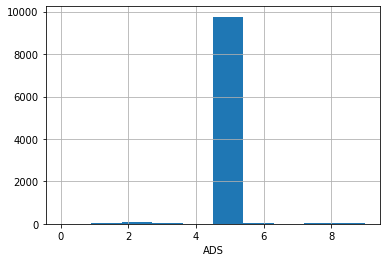

In [10]:
dataset = pd.read_csv('Dataset/Ads_CTR_Optimisation.csv')

# is it better than UCB?
import math
import random
N = 10000
d = 10
ads_selected = []
N_0 = [0] * d
N_1 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        theta = random.betavariate(N_0[i]+1, N_1[i]+1)
        if (theta > max_random):
            max_random = theta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 0:
        N_0[ad] = N_0[ad] + 1
    if reward == 1:
        N_1[ad] = N_1[ad] + 1
    total_reward = total_reward + reward

plt.hist(ads_selected)
plt.xlabel('ADS')
plt.grid()
plt.show()

The best one is the TS because with 500 obsevations, it's able to find the best ad. In more situations it's better than UCB.

<h3><center> DIFFERENCES BETWEEN TECHNIQUES </h3></center>

- UCB is a deterministic algorithm, TS is a probabilistic one because the sampling is part of the methodology.
- UCB requires update at every round, TS can accomodate delayed feedback (indeed it's possible to collect several result and then modifies the distribution).
- TS has a better empirical evidence